Train a model to recognize Mia

In [57]:
import fastbook
fastbook.setup_book()
import warnings
warnings.filterwarnings('ignore')

from fastai.vision.all import *



In [58]:
path = Path('mb')
fns = get_image_files(path)
#failed = verify_images(fns)
#failed.map(Path.unlink);


In [59]:
mb_people = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))


In [60]:
dls = mb_people.dataloaders(path)

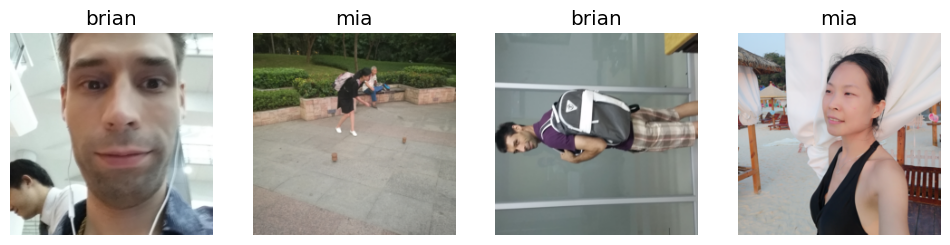

In [61]:
dls.valid.show_batch(max_n=4, nrows=1)

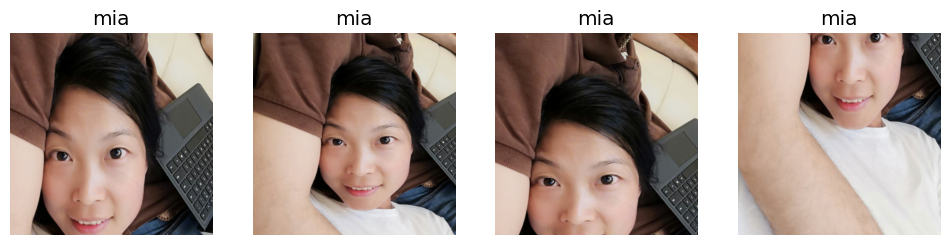

In [62]:
mb_people = mb_people.new(item_tfms=RandomResizedCrop(500, min_scale=0.3))
dls = mb_people.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

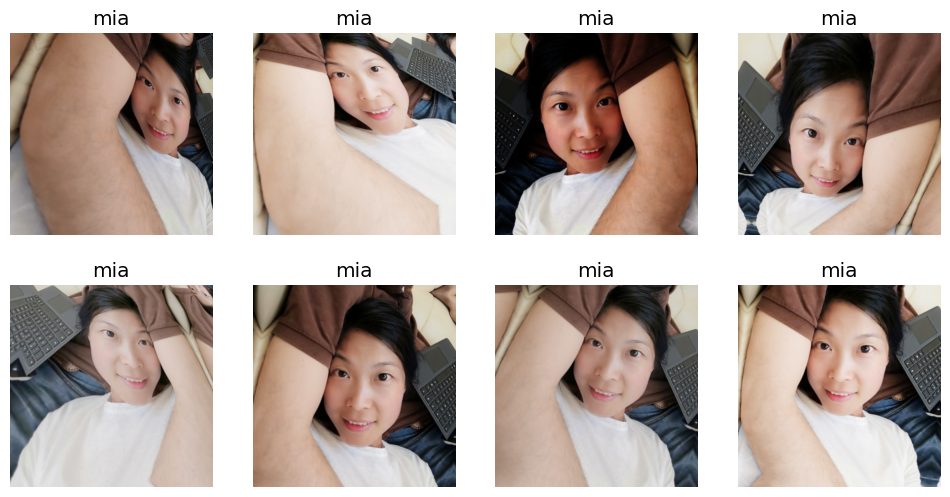

In [63]:
mb_people = mb_people.new(item_tfms=Resize(500), batch_tfms=aug_transforms(mult=2))
dls = mb_people.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [67]:
mb_people = mb_people.new(
    item_tfms=RandomResizedCrop(500, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = mb_people.dataloaders(path)

In [68]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.198552,1.575055,0.375000,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.931662,0.718521,0.312500,00:05
1,0.777021,0.333571,0.156250,00:04
2,0.655989,0.165077,0.000000,00:05
3,0.555043,0.113540,0.000000,00:04
4,0.488062,0.106620,0.000000,00:04
5,0.437470,0.114657,0.000000,00:04


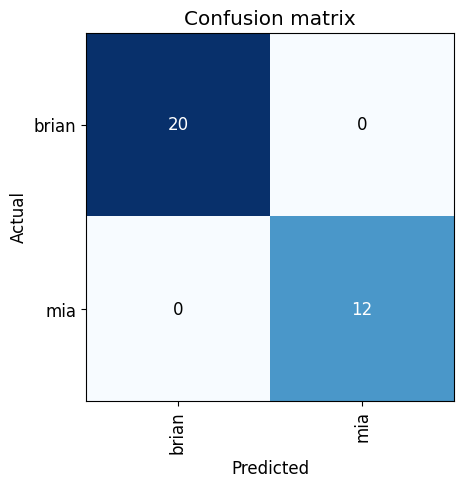

In [69]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

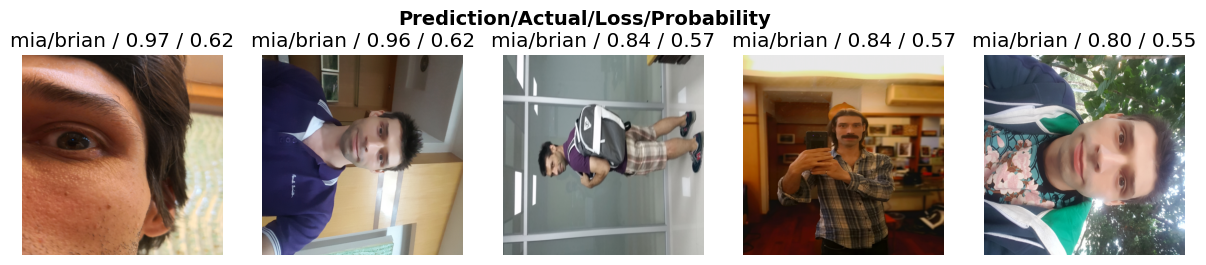

In [11]:
interp.plot_top_losses(5, nrows=1)

In [12]:
from fastbook import *
from fastai.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)
cleaner

In [13]:
from ipywidgets import FileUpload
uploader = FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [15]:
from fastbook import *
img = PILImage.create(uploader.data[0])
is_mia,_,probs = learn.predict(img)
print(f"Is this mia?: {is_mia}.")
print(f"Probability it's mia: {probs[1].item():.6f}")

Is this mia?: brian.
Probability it's mia: 0.389617


In [70]:
learn.export()

In [71]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [72]:
learn_inf = load_learner(path/'export.pkl')

In [73]:
learn_inf.predict('test images/m1.jpg')

('mia', tensor(1), tensor([0.2578, 0.7422]))

In [74]:
learn_inf.dls.vocab

['brian', 'mia']

In [84]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [86]:
img = PILImage.create(btn_upload.data[-1])

In [77]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(500,500))
out_pl

Output()

In [78]:
pred,pred_idx,probs = learn_inf.predict(img)

lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: mia; Probability: 0.7857')

In [79]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [81]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(500,500))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [87]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [2]:
import gradio as gr
from fastai.vision.all import *
#import skimage

learn = load_learner('export.pkl')
labels = learn.dls.vocab

def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}


title = "Is it Mia or Brian?"
description = "A Mia detector trained with fastai. Created as an exercise for fastbook."
article="<p style='text-align: center'><a href='https://levignelabs.com' target='_blank'>Lavigne Labs</a></p>"
examples = ['test images/b1.jpg','test images/b2.jpg','test images/m1.jpg']
interpretation='default'
enable_queue=True
gr.Interface(fn=predict,inputs=gr.inputs.Image(shape=(512, 512)),outputs=gr.outputs.Label(num_top_classes=3),title=title,description=description,article=article,examples=examples,interpretation=interpretation,enable_queue=enable_queue).launch(share=True)





/home/brian/miniconda3/envs/jupyter/lib/python3.11/site-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/brian/miniconda3/envs/jupyter/lib/python3.11/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/brian/miniconda3/envs/jupyter/lib/python3.11/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/brian/miniconda3/envs/jupyter/lib/python3.11/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/home/brian/miniconda3/envs/jupyter/lib/python3.11/site-packages/gradio/deprecation.py:40: UserWarning: `enable_qu

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://edaf804c9c9b02adb3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
